## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  80.584247   968.750335  0.198563  7.363333  1.397016
1  59.083681   129.066592  0.874027  2.396712  1.202843
2  33.103552   217.526193  0.079273  6.592764  0.425257
3   7.317146   535.976424  0.677490  1.093395  1.619799
4  22.261884  1353.799787  0.284310  6.179669  1.350825


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9192397	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9126515	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9045979	total: 58.7ms	remaining: 19.5s
3:	learn: 0.8975280	total: 59.3ms	remaining: 14.8s
4:	learn: 0.8867432	total: 59.9ms	remaining: 11.9s
5:	learn: 0.8795844	total: 60.4ms	remaining: 10s
6:	learn: 0.8719955	total: 60.7ms	remaining: 8.61s
7:	learn: 0.8626855	total: 61.2ms	remaining: 7.59s
8:	learn: 0.8549804	total: 61.6ms	remaining: 6.79s
9:	learn: 0.8487565	total: 62.1ms	remaining: 6.15s
10:	learn: 0.8400442	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8323606	total: 63ms	remaining: 5.19s
12:	learn: 0.8225898	total: 63.4ms	remaining: 4.81s
13:	learn: 0.8151121	total: 63.8ms	remaining: 4.49s
14:	learn: 0.8097461	total: 64.4ms	remaining: 4.23s
15:	learn: 0.8012987	total: 64.7ms	remaining: 3.98s
16:	learn: 0.7932836	total: 65ms	remaining: 3.76s
17:	learn: 0.7857472	total: 65.3ms	remaining: 3.56s
18:	learn: 0.7791754	total: 65.8ms	remaining: 3.4s

117:	learn: 0.3628704	total: 108ms	remaining: 810ms
118:	learn: 0.3605387	total: 109ms	remaining: 805ms
119:	learn: 0.3582405	total: 109ms	remaining: 801ms
120:	learn: 0.3559780	total: 110ms	remaining: 796ms
121:	learn: 0.3536655	total: 110ms	remaining: 791ms
122:	learn: 0.3514336	total: 110ms	remaining: 787ms
123:	learn: 0.3491711	total: 111ms	remaining: 782ms
124:	learn: 0.3470698	total: 111ms	remaining: 778ms
125:	learn: 0.3446312	total: 112ms	remaining: 775ms
126:	learn: 0.3416846	total: 112ms	remaining: 772ms
127:	learn: 0.3394939	total: 113ms	remaining: 768ms
128:	learn: 0.3373461	total: 113ms	remaining: 764ms
129:	learn: 0.3359550	total: 114ms	remaining: 764ms
130:	learn: 0.3342890	total: 115ms	remaining: 761ms
131:	learn: 0.3316833	total: 115ms	remaining: 758ms
132:	learn: 0.3301246	total: 116ms	remaining: 754ms
133:	learn: 0.3280594	total: 116ms	remaining: 750ms
134:	learn: 0.3259810	total: 117ms	remaining: 747ms
135:	learn: 0.3240629	total: 117ms	remaining: 742ms
136:	learn: 

295:	learn: 0.1593701	total: 186ms	remaining: 442ms
296:	learn: 0.1590959	total: 186ms	remaining: 441ms
297:	learn: 0.1586137	total: 187ms	remaining: 440ms
298:	learn: 0.1583152	total: 187ms	remaining: 439ms
299:	learn: 0.1577910	total: 188ms	remaining: 438ms
300:	learn: 0.1569751	total: 188ms	remaining: 437ms
301:	learn: 0.1562214	total: 189ms	remaining: 436ms
302:	learn: 0.1556849	total: 189ms	remaining: 435ms
303:	learn: 0.1550925	total: 189ms	remaining: 434ms
304:	learn: 0.1546059	total: 190ms	remaining: 432ms
305:	learn: 0.1540064	total: 190ms	remaining: 431ms
306:	learn: 0.1533136	total: 191ms	remaining: 430ms
307:	learn: 0.1526698	total: 191ms	remaining: 429ms
308:	learn: 0.1521128	total: 191ms	remaining: 428ms
309:	learn: 0.1517272	total: 192ms	remaining: 427ms
310:	learn: 0.1510169	total: 192ms	remaining: 426ms
311:	learn: 0.1504376	total: 192ms	remaining: 424ms
312:	learn: 0.1501810	total: 193ms	remaining: 423ms
313:	learn: 0.1495787	total: 193ms	remaining: 422ms
314:	learn: 

531:	learn: 0.0840610	total: 289ms	remaining: 254ms
532:	learn: 0.0839442	total: 290ms	remaining: 254ms
533:	learn: 0.0837786	total: 291ms	remaining: 254ms
534:	learn: 0.0833668	total: 291ms	remaining: 253ms
535:	learn: 0.0833095	total: 292ms	remaining: 252ms
536:	learn: 0.0831472	total: 292ms	remaining: 252ms
537:	learn: 0.0830662	total: 292ms	remaining: 251ms
538:	learn: 0.0828727	total: 293ms	remaining: 250ms
539:	learn: 0.0824730	total: 293ms	remaining: 250ms
540:	learn: 0.0822837	total: 294ms	remaining: 249ms
541:	learn: 0.0822218	total: 294ms	remaining: 248ms
542:	learn: 0.0820471	total: 294ms	remaining: 248ms
543:	learn: 0.0819679	total: 295ms	remaining: 247ms
544:	learn: 0.0815317	total: 295ms	remaining: 246ms
545:	learn: 0.0813608	total: 296ms	remaining: 246ms
546:	learn: 0.0809345	total: 296ms	remaining: 245ms
547:	learn: 0.0807697	total: 297ms	remaining: 245ms
548:	learn: 0.0803531	total: 297ms	remaining: 244ms
549:	learn: 0.0801917	total: 298ms	remaining: 244ms
550:	learn: 

711:	learn: 0.0558462	total: 367ms	remaining: 149ms
712:	learn: 0.0556665	total: 368ms	remaining: 148ms
713:	learn: 0.0555153	total: 368ms	remaining: 147ms
714:	learn: 0.0553667	total: 368ms	remaining: 147ms
715:	learn: 0.0553324	total: 369ms	remaining: 146ms
716:	learn: 0.0551861	total: 369ms	remaining: 146ms
717:	learn: 0.0551521	total: 370ms	remaining: 145ms
718:	learn: 0.0550081	total: 370ms	remaining: 145ms
719:	learn: 0.0549743	total: 370ms	remaining: 144ms
720:	learn: 0.0548326	total: 371ms	remaining: 143ms
721:	learn: 0.0547890	total: 371ms	remaining: 143ms
722:	learn: 0.0545913	total: 372ms	remaining: 142ms
723:	learn: 0.0544520	total: 372ms	remaining: 142ms
724:	learn: 0.0543151	total: 373ms	remaining: 141ms
725:	learn: 0.0542816	total: 373ms	remaining: 141ms
726:	learn: 0.0541468	total: 374ms	remaining: 140ms
727:	learn: 0.0541137	total: 374ms	remaining: 140ms
728:	learn: 0.0539810	total: 375ms	remaining: 139ms
729:	learn: 0.0539386	total: 375ms	remaining: 139ms
730:	learn: 

956:	learn: 0.0333202	total: 471ms	remaining: 21.1ms
957:	learn: 0.0332419	total: 471ms	remaining: 20.7ms
958:	learn: 0.0331383	total: 472ms	remaining: 20.2ms
959:	learn: 0.0329880	total: 472ms	remaining: 19.7ms
960:	learn: 0.0329114	total: 472ms	remaining: 19.2ms
961:	learn: 0.0328105	total: 473ms	remaining: 18.7ms
962:	learn: 0.0327438	total: 473ms	remaining: 18.2ms
963:	learn: 0.0326441	total: 474ms	remaining: 17.7ms
964:	learn: 0.0325785	total: 474ms	remaining: 17.2ms
965:	learn: 0.0324728	total: 475ms	remaining: 16.7ms
966:	learn: 0.0324083	total: 475ms	remaining: 16.2ms
967:	learn: 0.0323112	total: 475ms	remaining: 15.7ms
968:	learn: 0.0321509	total: 476ms	remaining: 15.2ms
969:	learn: 0.0320874	total: 476ms	remaining: 14.7ms
970:	learn: 0.0319850	total: 477ms	remaining: 14.2ms
971:	learn: 0.0319225	total: 477ms	remaining: 13.7ms
972:	learn: 0.0318283	total: 477ms	remaining: 13.2ms
973:	learn: 0.0317669	total: 478ms	remaining: 12.8ms
974:	learn: 0.0317074	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

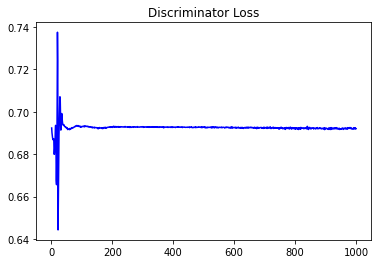

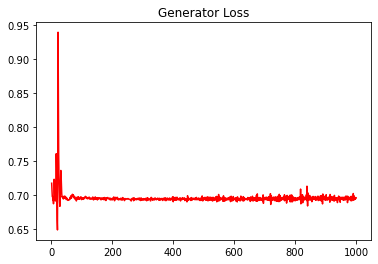

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4003235778757593


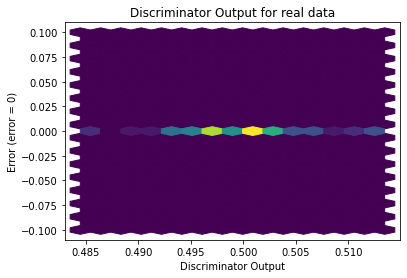

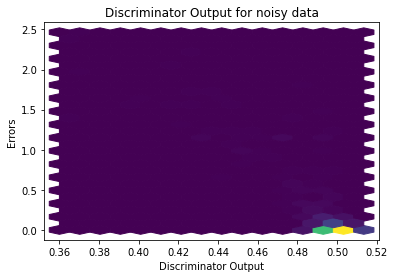

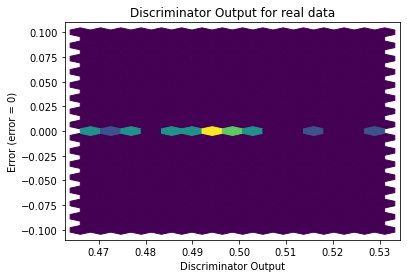

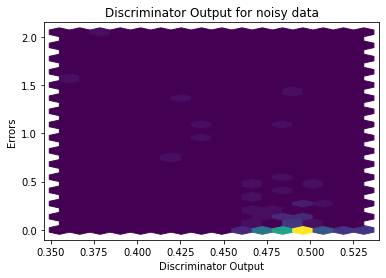

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


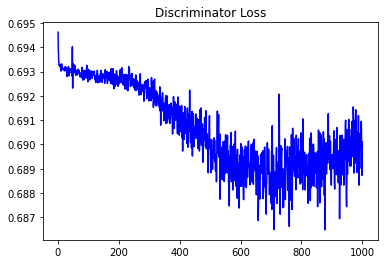

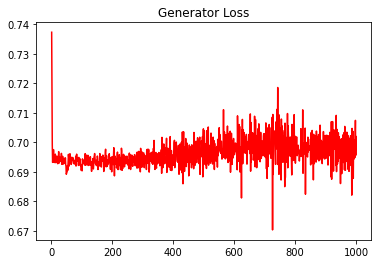

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4719859511332932


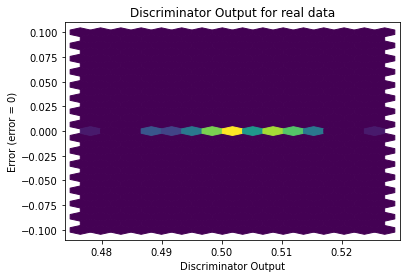

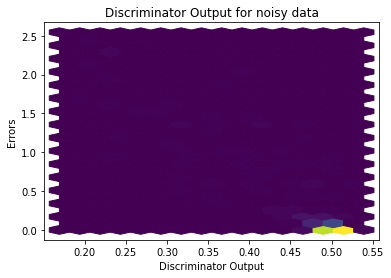

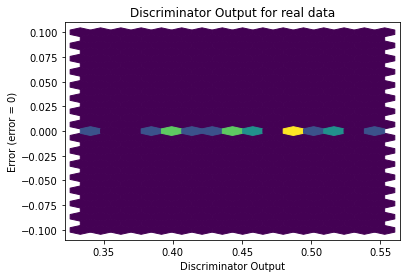

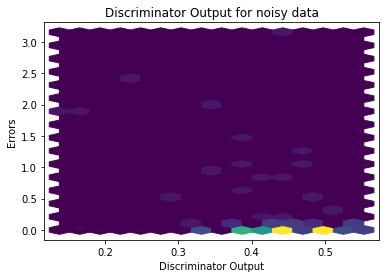

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2306]], requires_grad=True)
